# Import libraries and modules


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=2fe3448c30fb36635ab72107529ef7e5a51a0bdd8de510082f3c922314c1d7bb
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [3]:
import joblib
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
from deepface import DeepFace
import cv2 as cv
from google.colab.patches import cv2_imshow

24-05-15 06:51:33 - Directory /root/.deepface created
24-05-15 06:51:33 - Directory /root/.deepface/weights created


# Load models from Drive


In [4]:
KNN = joblib.load('/gdrive/MyDrive/Model/myKNN_225.joblib')
SVM = joblib.load('/gdrive/MyDrive/Model/mySVM_225.joblib')
SM = joblib.load('/gdrive/MyDrive/Model/mySoftmax_225.joblib')

# Define necessary functions

In [14]:
# Take photo func:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Draw boundary of face:
def draw_boundary(img_path):
  face = DeepFace.extract_faces(
    img_path = img_path,
    detector_backend = 'opencv'
  )

  x = face[0]['facial_area']['x']
  y = face[0]['facial_area']['y']
  w = face[0]['facial_area']['w']
  h = face[0]['facial_area']['h']

  image = cv.imread(img_path)
  cv.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
  cv2_imshow(image)

# Convert label to name:
def label2name(label):
  if label == 0:
    return "Bảo"
  elif label == 1:
    return "Khánh"
  else:
    return "Vy"

# Predict func:
def predict_image(image_path):
  img = cv.imread(image_path, 0)

  embedding_objs = DeepFace.represent(
      img_path = image_path,
      model_name = 'Facenet512',
      detector_backend = 'opencv'
  )

  featured_vector = [embedding_objs[0]['embedding']]
  label_predict_KNN = KNN.predict(featured_vector)
  label_predict_SVM = SVM.predict(featured_vector)
  label_predict_SM = SM.predict(featured_vector)

  if (label_predict_KNN[0] == label_predict_KNN[0] and label_predict_KNN[0] == label_predict_KNN[0]):
    print("\nThis is: " + label2name(label_predict_KNN[0]))
  else:
    print("This is unknown person")

# Take and predict photo:
def take_predict(filename='photo.jpg', quality=1e5):
  try:
    file_name = take_photo(filename=filename, quality=quality)
    print('Saved to {}'.format(file_name))
    draw_boundary(file_name)
    predict_image(filename)
  except Exception as err:
    print(str(err))

# Take a photo to predict who is in it

<IPython.core.display.Javascript object>

Saved to Bao.jpg


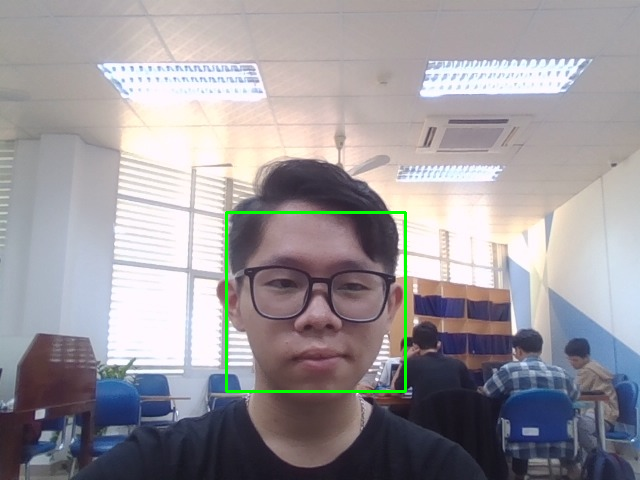


This is: Bảo


In [ ]:
take_predict(filename='Bao.jpg', quality=1e5)

<IPython.core.display.Javascript object>

Saved to Vy.jpg


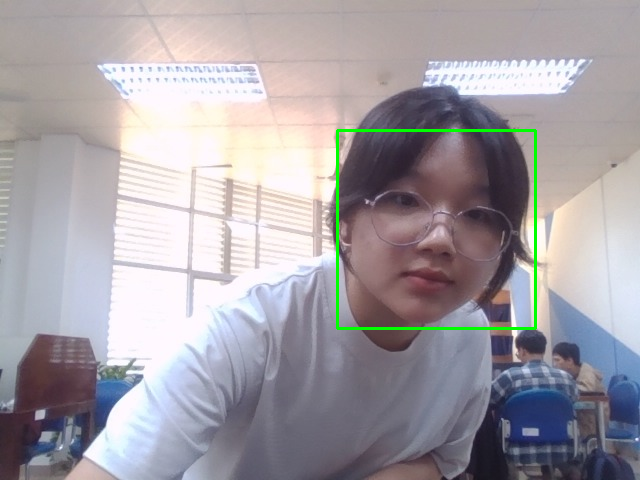


This is: Vy


In [ ]:
take_predict(filename='Vy.jpg', quality=1e5)

<IPython.core.display.Javascript object>

Saved to Khanh.jpg


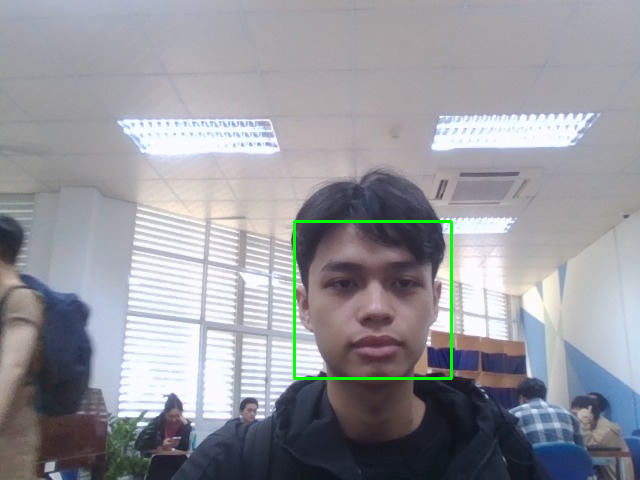


This is: Khánh


In [ ]:
take_predict(filename='Khanh.jpg', quality=1e5)

<IPython.core.display.Javascript object>

Saved to image.jpg


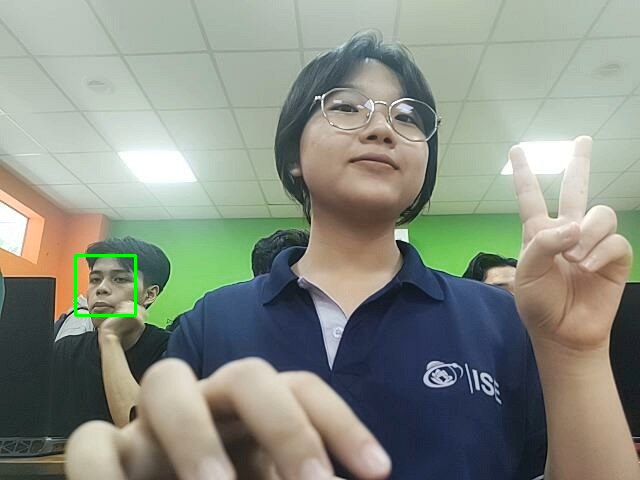

24-05-15 06:39:22 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:00<00:00, 99.0MB/s]



This is: Khánh


In [ ]:
take_predict(filename='image.jpg', quality=1e5)

<IPython.core.display.Javascript object>

Saved to img.jpg


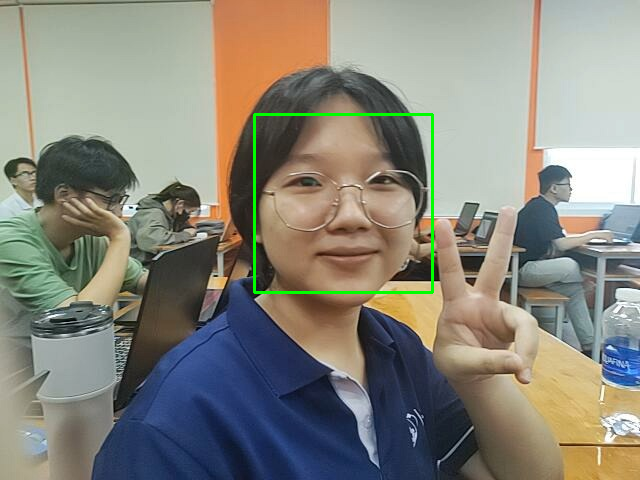


This is: Vy


In [ ]:
take_predict(filename='img.jpg', quality=1e5)

<IPython.core.display.Javascript object>

Saved to img.jpg


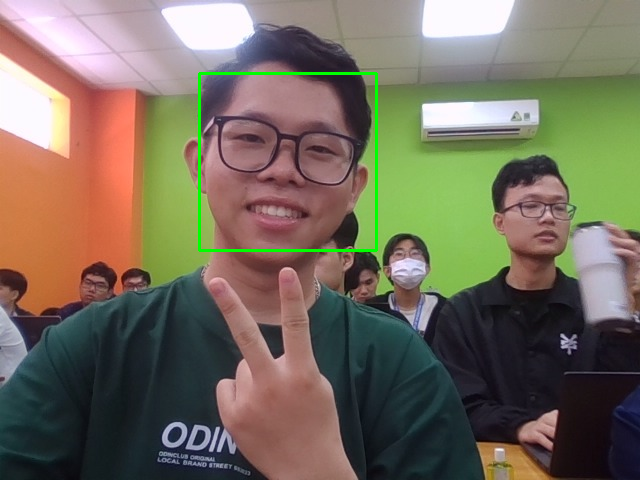


This is: Bảo


In [15]:
take_predict(filename='img.jpg', quality=1e5)